## 싸인 함수 회귀분석 (Sine Regression)

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) 

2.0.0


## 데이터 생성

#### Spiral Data Generation 함수 정의

In [3]:
theta = 4

# generate the data
def generate_spiral_dataset(num_data, num_class, num_dim=2):
    input_data = np.zeros((num_data*num_class,num_dim)) # data matrix (each row = single example)
    output_data = np.zeros(num_data*num_class, dtype='uint8') # class labels

    for j in range(num_class):
      ix = range(num_data*j,num_data*(j+1))
      r = np.linspace(0.0,1,num_data) # radius [0,1]
      t = np.linspace(j*theta,(j+1)*theta,num_data) + np.random.randn(num_data)*0.2 # theta [0, 4]
      input_data[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
      output_data[ix] = j
    
    return input_data, output_data

#### 훈련 데이터, 테스트 데이터 생성

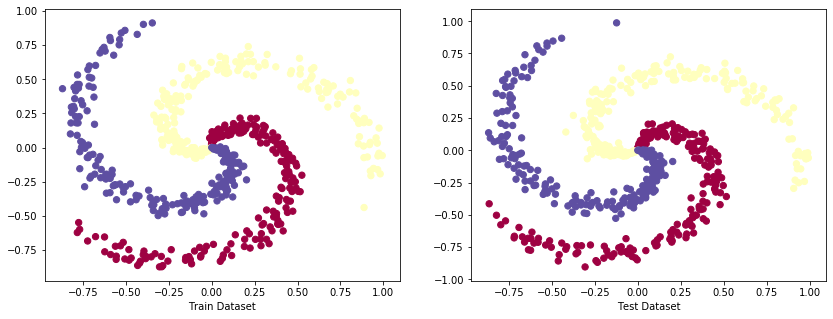

In [18]:
N = 200 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes

train_x, train_y = generate_spiral_dataset(N, K, D)
test_x, test_y = generate_spiral_dataset(N, K, D)

# lets visualize the data:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, s=40, cmap=plt.cm.Spectral)
plt.xlabel("Train Dataset")
plt.subplot(1,2,2)
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, s=40, cmap=plt.cm.Spectral)
plt.xlabel("Test Dataset")
plt.show()

## 모델 정의

In [19]:
model = keras.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=[D]),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(K, activation='softmax')
])

## 모델 훈련

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_x, train_y, epochs=100)

Train on 600 samples
Epoch 1/100
600/600 [==============================] - 0s 708us/sample - loss: 1.0544 - accuracy: 0.3967
Epoch 2/100
600/600 [==============================] - 0s 58us/sample - loss: 1.0169 - accuracy: 0.5067
Epoch 3/100
600/600 [==============================] - 0s 57us/sample - loss: 0.9789 - accuracy: 0.5167
Epoch 4/100
600/600 [==============================] - 0s 58us/sample - loss: 0.9413 - accuracy: 0.5267
Epoch 5/100
600/600 [==============================] - 0s 57us/sample - loss: 0.9034 - accuracy: 0.5417
Epoch 6/100
600/600 [==============================] - 0s 56us/sample - loss: 0.8666 - accuracy: 0.5583
Epoch 7/100
600/600 [==============================] - 0s 60us/sample - loss: 0.8312 - accuracy: 0.5667
Epoch 8/100
600/600 [==============================] - 0s 61us/sample - loss: 0.8002 - accuracy: 0.5700
Epoch 9/100
600/600 [==============================] - 0s 53us/sample - loss: 0.7710 - accuracy: 0.5867
Epoch 10/100
600/600 [====================

600/600 [==============================] - 0s 60us/sample - loss: 0.1008 - accuracy: 0.9900
Epoch 79/100
600/600 [==============================] - 0s 60us/sample - loss: 0.0986 - accuracy: 0.9967
Epoch 80/100
600/600 [==============================] - 0s 53us/sample - loss: 0.0971 - accuracy: 0.9900
Epoch 81/100
600/600 [==============================] - 0s 50us/sample - loss: 0.0957 - accuracy: 0.9917
Epoch 82/100
600/600 [==============================] - 0s 55us/sample - loss: 0.0940 - accuracy: 0.9883
Epoch 83/100
600/600 [==============================] - 0s 55us/sample - loss: 0.0921 - accuracy: 0.9967
Epoch 84/100
600/600 [==============================] - 0s 57us/sample - loss: 0.0903 - accuracy: 0.9917
Epoch 85/100
600/600 [==============================] - 0s 52us/sample - loss: 0.0890 - accuracy: 0.9900
Epoch 86/100
600/600 [==============================] - 0s 57us/sample - loss: 0.0872 - accuracy: 0.9933
Epoch 87/100
600/600 [==============================] - 0s 52us/samp

## 테스트

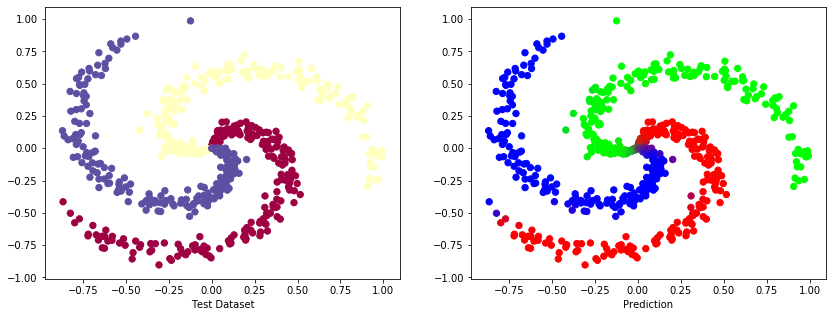

In [21]:
test_output_pred = model.predict(test_x)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, s=40, cmap=plt.cm.Spectral)
plt.xlabel("Test Dataset")
plt.subplot(1,2,2)
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_output_pred, s=40, cmap=plt.cm.Spectral)
plt.xlabel("Prediction")
plt.show()